In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

#PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

#Nuestras funciones
execfile('/Users/andreac.henechesierra/Desktop/Master_Data_Science/Mineria_de_datos_y_modelizacion_predictiva/NuestrasFunciones.py')


# Análisis de datos provenientes de radiografías de tumores, dataset wisconsin

In [2]:
# Lectura de datos
wisconsin = pd.read_excel('/Users/andreac.henechesierra/Desktop/Master_Data_Science/Mineria_de_datos_y_modelizacion_predictiva/Datos/wisconsin.xlsx')
wisconsin.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
wisconsin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Separamos la variable objetivo binaria y la variable ID de las numéricas

In [4]:
varObj = wisconsin.diagnosis
varId = wisconsin.id
wisconsin.drop(['diagnosis','id'],axis=1,inplace=True)
wisconsin

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Matriz de correlaciones entre las variables numéricas. Conclusiones.

## Adecuación muestral 

1. **Matriz de correlaciones entre las variables**. Esta matriz nos permite observar si hay correlaciones entre las variables, lo cual es necesario en este caso para poder considerar la PCA, ya que nos interesan valores de correlación altos (sean positivos o negativos) debido a que eso es síntoma de estructura de varianzas compartidas y nos conviene para captar la varianza común con las componentes principales.

In [5]:
corr = wisconsin.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)
#precision para el numero de decimales que queremos observar

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
fractal_dimension_mean,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,0.000,0.164,0.040,-0.090,0.402,0.560,0.447,0.341,0.345,0.688,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


## Conclusiones sobre correlaciones:

**Tenemos muchas variables que tienen alta correlación, esto puede deberse a que las variables son aspectos diferentes de una misma característica, por ejemplo: radius_mean, radius_se, radius_worst.**

La alta correlación entre tantas variables indica que nuestro dataset es apto para un PCA, sin embargo será necesario verificar también el test de esferidad y el KMO.

2. **Test de esferidad de Bartlett**. Lo utilizaremos para comparar la matriz de correlaciones con una matriz de identidad y extraer un p-valor, que nos interesa que sea <0.05 para poder rechazar la hipótesis nula de que nuestra Matriz de correlaciones = Matriz de identidad, esto debido a que una matriz identidad tiene componentes absolutamente ortogonales, es decir, 0 correlación o varianza compartida. 

In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(wisconsin)

(39362.12084113237, 0.0)

3. **KMO-MSA global y por variable**. Con este índice buscamos comparar la correlación observada entre pares de variables y sus correspondientes correlaciones parciales (una vez eliminado el efecto de otras variables presentes). Buscamos valores superiores a 0.5 y cuanto más cercanos a 1, mejor. Esto nos indicará si hay correlación entre los pares de variables a pesar de eliminar el efecto que puedan tener otras variables en esa relación.

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(wisconsin)
#me da una solucion dentro del array por cada una de las variables del archivo, 
#y luego un KMO global de la muestra en general, todas las variables juntas

calculate_kmo(wisconsin.drop(['texture_se'], axis=1))
#como area tiene bajo indice, calculamos de nuevo el KMO sin ella y podriamos excluirla de las variables del modelo

/Users/andreac.henechesierra/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/Users/andreac.henechesierra/opt/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


(array([0.83383775, 0.71380996, 0.85236309, 0.86613237, 0.8119036 ,
        0.87978917, 0.89148028, 0.8989748 , 0.83287842, 0.83044023,
        0.83272641, 0.83872779, 0.85713086, 0.61630817, 0.87022696,
        0.82281541, 0.83113907, 0.58402361, 0.80709036, 0.82286537,
        0.71827893, 0.88349999, 0.82210308, 0.75028776, 0.85248406,
        0.90181629, 0.88817103, 0.70426333, 0.81112789]),
 0.8398097573843759)

## Comentarios sobre Adecuación muestral:

**En cuanto al test de esferidad**: Tenemos un p-valor muy bajo, con lo cual, podemos rechazar por completo la H0 y por tanto admitir que existen correlaciones o varianza compartida entre las variables.

**En cuanto al KMO**: Tenemos un KMO global bueno ya que es superior a 0.7, siendo 83.98. Podemos observar además que todas las variables a nivel individual tienen un valor superior a 0.5. Esto nos indica que hay alta correlación observada entre pares de variables y sus correspondientes correlaciones parciales (una vez eliminado el efecto de otras variables presentes).


# El modelo trata de predecir la variable binaria diagnosis (‘M,’B’).

Para la predicción de la variable categórica binaria el modelo que usaremos es el modelo de Regresión logística (modelo de clasificación), donde buscaremos estimar el logit de la Odds Ratio de una de las clases sobre otra. Es decir, la probabilidad de que diagnosis sea M vs la probabilidad de que diagnosis sea B. En este caso se trata de muchas variables continuas que contienen además muy alta correlación entre ellas,  la cantidad de variables haría el modelo muy complejo de interpretar y sobre parametrizado, a la vez que la alta correlación entre variables nos generaría problemas de multicolinealidad. Es por esto que lo mejor en este caso es plantear una reducción de dimensiones a través de la realización de un PCA.

# Escalado de datos

Antes de realizar el PCA debemos escalar los datos ya que la distintas variables están en distintas escalas.

En este caso como utilizaremos la función pca, para el escalado de datos seleccionamos el atributo normalize=True dentro de la propia función. Que justo nos permite realizar el escalado de datos.

# Utilizando como predictores las componentes principales resultantes del PCA, buscaremos retener al menos el 70% de la variabilidad de los datos.

Hemos valorado anteriormente la adecuación muestral a través de la matriz de correlaciones, el test de esferidad y el índice KMO. Todo esto nos lleva a concluir que nuestra muestra es adecuada para la realización de un PCA.

### Análisis de Componentes Principales (PCA)
En la propia función pca podemos indicar el porcentaje de variabilidad del archivo que queremos retener, como en nuestro caso es el 70%, introduciremos el argumento n_components=0.7 dentro de la función lo cual nos devolverá el número de componentes que debemos considerar.

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [70.0%] explained variance using the [30] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [70.00%] explained variance.
[pca] >The PCA reduction is performed on the [30] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


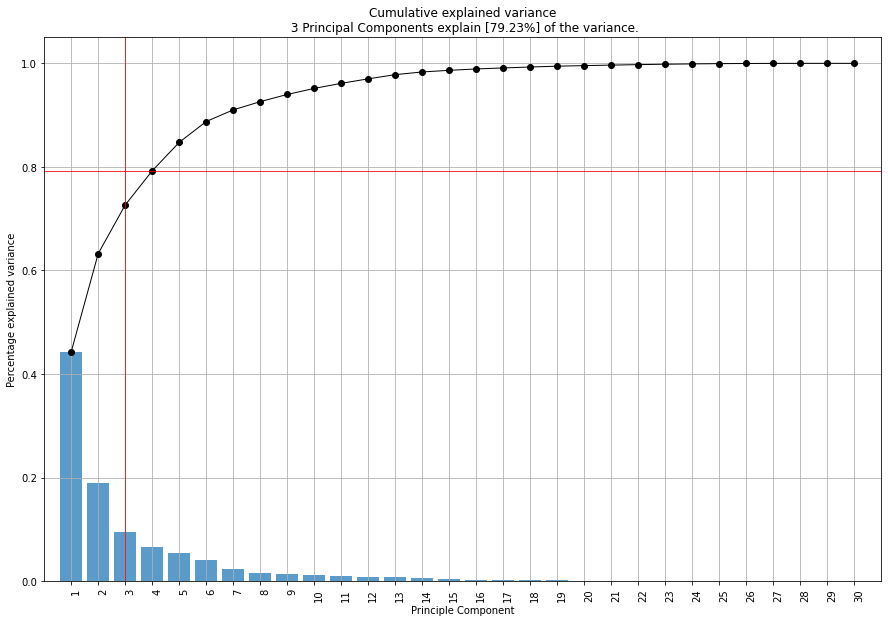

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [79.23%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [8]:
# Load library
from pca import pca

# Initialize pca with default parameters
model = pca(normalize=True,n_components=0.7)

# Fit transform
results = model.fit_transform(wisconsin)

# Plot the explained variance
model.plot()

In [9]:
model.results

{'loadings':      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
 PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
 PC3    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
 
      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
 PC1          0.239285        0.258400             0.260854       0.138167   
 PC2          0.151892        0.060165            -0.034768       0.190349   
 PC3         -0.074092        0.002734            -0.025563      -0.040240   
 
      fractal_dimension_mean  ...  radius_worst  texture_worst  \
 PC1                0.064363  ...      0.227997       0.104469   
 PC2                0.366575  ...     -0.219866      -0.045467   
 PC3               -0.022574  ...     -0.047507      -0.042298   
 
      perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
 PC1         0.2

In [10]:
#Evaluamos las cargas para determinar que variables originales tienen más peso en la formación de los componentes principales
model.results['loadings']

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025563,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [79.23%] of the variance'}, xlabel='PC1 (44.2% expl.var)', ylabel='PC2 (18.9% expl.var)'>)

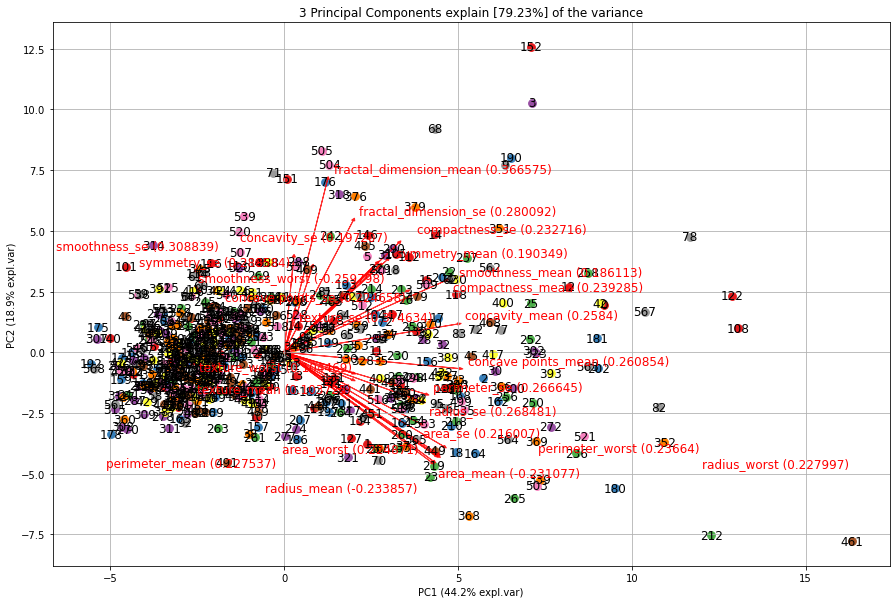

In [11]:
# Hacemos el biplot de la varianza explicada
model.biplot(legend=False)
#plt.show()

## Número de componentes e Interpretación de la componente 1.

Una vez realizado nuestro ACP identificamos que para retener el 70% de la variabilidad del archivo necesitamos considerar 3 componentes. 

### Interpretación de la componente 1:
La componente 1 nos explica un 44.2% de la variabilidad del archivo. Y tal como se puede observar de las cargas/saturaciones, está asociada principalmente en sentido positivo a las variables con medidas sobre **concave, concativity, compactness, area, perimeter y radius. Siendo las variables asociadas a concave las que tienen mayor carga**: \
**Variables con mayor saturación**: concave points_worst, concavity_worst, compactness_worst, area_worst, perimeter_worst, radius_worst, concave points_mean, concavity_mean, compactness_mean, area_mean, perimeter_mean, radius_mean

## Creo el input (variables predictoras) con estas componentes (matriz de scores o puntuaciones) y ajusto un modelo de predicción para la variable objetivo diagnosis.

In [12]:
input_pca_wis = model.results['PC']
input_pca_wis

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877029


In [13]:
#Unimos input de componentes principales con variable objetivo binaria
def_wis = pd.concat([input_pca_wis, varObj], axis=1)
def_wis

,PC1,PC2,PC3,diagnosis
0,9.192837,1.948583,-1.123166,M
1,2.387802,-3.768172,-0.529293,M
2,5.733896,-1.075174,-0.551748,M
3,7.122953,10.275589,-3.232790,M
4,3.935302,-1.948072,1.389767,M
...,...,...,...,...
564,6.439315,-3.576817,2.459487,M
565,3.793382,-3.584048,2.088476,M
566,1.256179,-1.902297,0.562730,M
567,10.374794,1.672010,-1.877029,M


In [14]:
#Reemplazamos valores de la variable obj diagnosis: M=1, B=0
def_wis.diagnosis.replace('M',1,inplace=True)
def_wis.diagnosis.replace('B',0,inplace=True)
def_wis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PC1        569 non-null    float64
 1   PC2        569 non-null    float64
 2   PC3        569 non-null    float64
 3   diagnosis  569 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 22.2 KB


In [15]:
def_wis.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

**Se advierte un desbalance de clases ya que tenemos más 0 (B) que 1 (M). Con lo cual es probable que experimentemos problemas de sensibilidad.**

## Ajustamos modelo de regresión logística

In [16]:
# Importamos la api para fórmulas (en concreto ols para regresión)
from statsmodels.formula.api import logit 
form1 = 'diagnosis ~ PC1'

# Ajustar modelo 1
modelo1 = logit(form1,data=def_wis).fit()
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.218923
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.6685
Time:                        14:43:10   Log-Likelihood:                -124.57
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.995e-111
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7025      0.166     -4.231      0.000      -1.028      -0.377
PC1            1.1521      0.099     11.623      0.000       0.958       1.346
==============================================================================
"""

In [17]:
form2 = 'diagnosis ~ PC1 + PC2'

# Ajustar modelo
modelo2 = logit(form2,data=def_wis).fit()
modelo2.summary()

Optimization terminated successfully.
         Current function value: 0.120897
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.8169
Time:                        14:43:10   Log-Likelihood:                -68.791
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                5.038e-134
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4261      0.220     -1.933      0.053      -0.858       0.006
PC1            2.1950      0.268      8.177      0.000       1.669       2.721
PC2           -1.2245      0.180     -6.799      0.000      -1.577      -0.871
==============================================================================

Possibly complete quasi-separation: A fraction 0.23 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
form3 = 'diagnosis ~ PC1 + PC2 + PC3'

# Ajustar modelo
modelo3 = logit(form3,data=def_wis).fit()
modelo3.summary()

Optimization terminated successfully.
         Current function value: 0.108409
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.8358
Time:                        14:43:10   Log-Likelihood:                -61.685
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.278e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6762      0.242     -2.796      0.005      -1.150      -0.202
PC1            2.3183      0.304      7.616      0.000       1.722       2.915
PC2           -1.2829      0.212     -6.059      0.000      -1.698      -0.868
PC3           -0.4878      0.141     -3.468      0.001      -0.764      -0.212
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Conclusiones del modelo por validación cruzada repetida e Interpretación del parámetro de la componente 1.

In [19]:
# Creamos lista de fórmulas   
list_form = [form1,form2,form3]
list_form

# Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_results = pd.DataFrame(map(lambda x: cross_val_log(x,def_wis, seed=2023),list_form))

Modelo: diagnosis ~ PC1
AUC: 0.970 (0.013)
Modelo: diagnosis ~ PC1 + PC2
AUC: 0.990 (0.006)
Modelo: diagnosis ~ PC1 + PC2 + PC3
AUC: 0.990 (0.006)


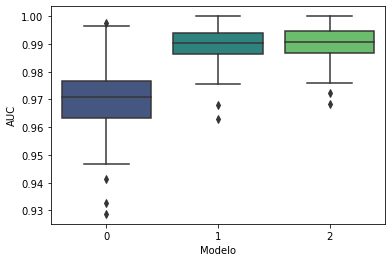

In [20]:
# Transponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_results.T.melt()
results.columns = ['Modelo','AUC']
results.head()

# Boxplot paralelo para comparar
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()

### Elección del modelo:
**Nos quedamos con el Modelo: diagnosis ~ PC1 + PC2 + PC3 ya que tiene un pseudo R2 superior y por ser estos 3 componentes los que cumplen el criterio de la variabilidad solicitada. Sin embargo, es importante mencionar que comprobamos con la validación cruzada que para nuestro modelo de regresión logística, incluir la componente 3 no aporta una mejora en las métricas de AUC**

In [21]:
modeloFinal = logit(form3,data=def_wis).fit()
modeloFinal.summary()

Optimization terminated successfully.
         Current function value: 0.108409
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.8358
Time:                        14:43:12   Log-Likelihood:                -61.685
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                8.278e-136
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6762      0.242     -2.796      0.005      -1.150      -0.202
PC1            2.3183      0.304      7.616      0.000       1.722       2.915
PC2           -1.2829      0.212     -6.059      0.000      -1.698      -0.868
PC3           -0.4878      0.141     -3.468      0.001      -0.764      -0.212
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Interpretación del parámetro de la componente 1.
Para interpretar: exponencial de los parámetros (coeficientes del summary del modelo por variable/componente) y tengo el Odds Ratio

**En nuestro caso el beta de la componente 1 es 2.3**

In [22]:
#calculamos ORs
np.exp(modeloFinal.params)

Intercept     0.508541
PC1          10.158264
PC2           0.277231
PC3           0.613948
dtype: float64

En base a los ORs del modelo podemos concluir que:

- El aumento unitario de la componente 1 provoca un aumento de la probabilidad de diagnosis M. La probabilidad de diagnosis M es 10.158264 veces mayor con cada aumento unitario del score del registro en la componente 1.

Mientras que el aumento unitario de la componente 2 y 3 provoca una disminución de la probabilidad de diagnosis M. 

### Comentarios finales:

A pesar de que existe un desbalance de clases en la variable objetivo binaria diagnosis, en este caso no será necesario realizar el análisis de punto de corte óptimo ya que hemos utilizado la CV para medir la capacidad del modelo basada en AUC que no depende del punto de corte.